# Trabalho prático DAA

### The Data

This dataset contains 5000 cases and 13 features, including:

- city_name
- magnitude_of_delay
- delay_in_seconds
- affected_roads
- record_date
- luminosity
- avg_temperature
- avg_atm_pressure
- avg_humidity
- avg_wind_speed
- avg_precipitation
- avg_rain
- incidents

## Import Libraries

In [284]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the data

In [285]:
data = pd.read_csv('sbstpdaa2223/training_data.csv')
test = pd.read_csv('sbstpdaa2223/test_data.csv')

# Handling missing data and possible data transformations
- Remove missing values, outliers, and unnecessary rows/ columns
- Check and impute null values
- Check Imbalanced data
- Re-indexing and reformatting our data

<AxesSubplot:>

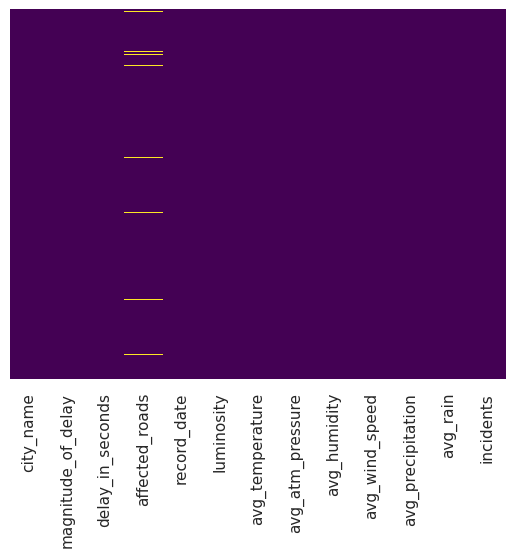

In [286]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False,cmap='viridis')

In [287]:
data.drop(['affected_roads'], axis = 1, inplace = True)
test.drop(['affected_roads'], axis = 1, inplace = True)

In [288]:
data.head()

city_name magnitude_of_delay  delay_in_seconds       record_date  \
0  Guimaraes          UNDEFINED                 0  2021-03-15 23:00   
1  Guimaraes          UNDEFINED               385  2021-12-25 18:00   
2  Guimaraes          UNDEFINED                69  2021-03-12 15:00   
3  Guimaraes              MAJOR              2297  2021-09-29 09:00   
4  Guimaraes          UNDEFINED                 0  2021-06-13 11:00   

  luminosity  avg_temperature  avg_atm_pressure  avg_humidity  avg_wind_speed  \
0       DARK             12.0            1013.0          70.0             1.0   
1       DARK             12.0            1007.0          91.0             1.0   
2      LIGHT             14.0            1025.0          64.0             0.0   
3      LIGHT             15.0            1028.0          75.0             1.0   
4      LIGHT             27.0            1020.0          52.0             1.0   

   avg_precipitation   avg_rain  incidents  
0                0.0  Sem Chuva       None  
1                0.0  Sem Chuva       None  
2                0.0  Sem Chuva        Low  
3                0.0  Sem Chuva  Very_High  
4                0.0  Sem Chuva       High

In [289]:
data.nunique()

city_name                1
magnitude_of_delay       3
delay_in_seconds      1186
record_date           5000
luminosity               3
avg_temperature         35
avg_atm_pressure        36
avg_humidity            83
avg_wind_speed          11
avg_precipitation        1
avg_rain                 4
incidents                5
dtype: int64

In [290]:
data.drop(['avg_precipitation', 'city_name'], axis = 1, inplace = True)
test.drop(['avg_precipitation', 'city_name'], axis = 1, inplace = True)

In [291]:
data.isnull().sum()

magnitude_of_delay    0
delay_in_seconds      0
record_date           0
luminosity            0
avg_temperature       0
avg_atm_pressure      0
avg_humidity          0
avg_wind_speed        0
avg_rain              0
incidents             0
dtype: int64

In [292]:
data.dropna(inplace=True)

In [293]:
data.head()

magnitude_of_delay  delay_in_seconds       record_date luminosity  \
0          UNDEFINED                 0  2021-03-15 23:00       DARK   
1          UNDEFINED               385  2021-12-25 18:00       DARK   
2          UNDEFINED                69  2021-03-12 15:00      LIGHT   
3              MAJOR              2297  2021-09-29 09:00      LIGHT   
4          UNDEFINED                 0  2021-06-13 11:00      LIGHT   

   avg_temperature  avg_atm_pressure  avg_humidity  avg_wind_speed   avg_rain  \
0             12.0            1013.0          70.0             1.0  Sem Chuva   
1             12.0            1007.0          91.0             1.0  Sem Chuva   
2             14.0            1025.0          64.0             0.0  Sem Chuva   
3             15.0            1028.0          75.0             1.0  Sem Chuva   
4             27.0            1020.0          52.0             1.0  Sem Chuva   

   incidents  
0       None  
1       None  
2        Low  
3  Very_High  
4       High

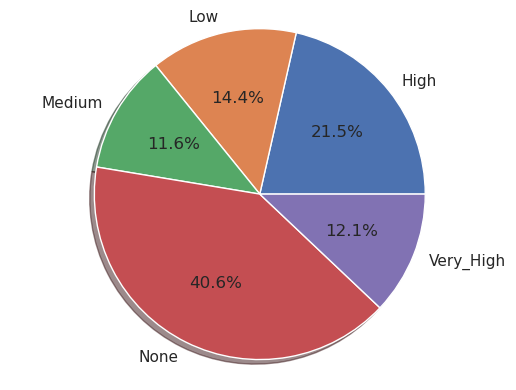

In [294]:
labels = data['incidents'].astype('category').cat.categories.tolist()
counts = data['incidents'].value_counts()

sizes = [counts[var_cat] for var_cat in labels]

fig, axl = plt.subplots()

axl.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the ¥ on plot
axl. axis('equal')

plt.show()


/home/miguel/miniconda3/envs/daa/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


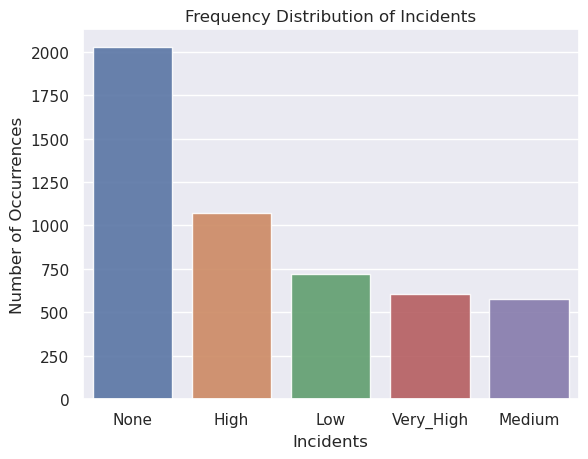

In [295]:
incidents_count = data['incidents'].value_counts()
sns.set(style="darkgrid")

sns.barplot(incidents_count.index, incidents_count.values, alpha=0.9)
plt.title('Frequency Distribution of Incidents')

plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Incidents', fontsize=12)

plt.show()

In [296]:
replace_map = {'incidents': {'None': 0, 'Low': 1, 'Medium': 2, 'High' : 3, 'Very_High':4}}

In [297]:
data.replace(replace_map, inplace = True)
test.replace(replace_map, inplace = True)
data.head()

magnitude_of_delay  delay_in_seconds       record_date luminosity  \
0          UNDEFINED                 0  2021-03-15 23:00       DARK   
1          UNDEFINED               385  2021-12-25 18:00       DARK   
2          UNDEFINED                69  2021-03-12 15:00      LIGHT   
3              MAJOR              2297  2021-09-29 09:00      LIGHT   
4          UNDEFINED                 0  2021-06-13 11:00      LIGHT   

   avg_temperature  avg_atm_pressure  avg_humidity  avg_wind_speed   avg_rain  \
0             12.0            1013.0          70.0             1.0  Sem Chuva   
1             12.0            1007.0          91.0             1.0  Sem Chuva   
2             14.0            1025.0          64.0             0.0  Sem Chuva   
3             15.0            1028.0          75.0             1.0  Sem Chuva   
4             27.0            1020.0          52.0             1.0  Sem Chuva   

   incidents  
0          0  
1          0  
2          1  
3          4  
4          3

In [298]:
data['avg_rain'].unique()

array(['Sem Chuva', 'chuva moderada', 'chuva fraca', 'chuva forte'],
      dtype=object)

In [299]:
replace_map_rain = {'avg_rain': {'Sem Chuva' : 0, 'chuva fraca' : 1, 'chuva moderada' : 2, 'chuva forte' : 3}}

In [300]:
data.replace(replace_map_rain, inplace = True)
test.replace(replace_map_rain, inplace = True)
data.head()

magnitude_of_delay  delay_in_seconds       record_date luminosity  \
0          UNDEFINED                 0  2021-03-15 23:00       DARK   
1          UNDEFINED               385  2021-12-25 18:00       DARK   
2          UNDEFINED                69  2021-03-12 15:00      LIGHT   
3              MAJOR              2297  2021-09-29 09:00      LIGHT   
4          UNDEFINED                 0  2021-06-13 11:00      LIGHT   

   avg_temperature  avg_atm_pressure  avg_humidity  avg_wind_speed  avg_rain  \
0             12.0            1013.0          70.0             1.0         0   
1             12.0            1007.0          91.0             1.0         0   
2             14.0            1025.0          64.0             0.0         0   
3             15.0            1028.0          75.0             1.0         0   
4             27.0            1020.0          52.0             1.0         0   

   incidents  
0          0  
1          0  
2          1  
3          4  
4          3

In [301]:
data['luminosity'].unique()

array(['DARK', 'LIGHT', 'LOW_LIGHT'], dtype=object)

In [302]:
replace_map_luminosity = {'luminosity': {'LOW_LIGHT' : 0, 'LIGHT' : 1, 'DARK' : 2}}

In [303]:
data.replace(replace_map_luminosity, inplace = True)
test.replace(replace_map_luminosity, inplace = True)
data.head()

magnitude_of_delay  delay_in_seconds       record_date  luminosity  \
0          UNDEFINED                 0  2021-03-15 23:00           2   
1          UNDEFINED               385  2021-12-25 18:00           2   
2          UNDEFINED                69  2021-03-12 15:00           1   
3              MAJOR              2297  2021-09-29 09:00           1   
4          UNDEFINED                 0  2021-06-13 11:00           1   

   avg_temperature  avg_atm_pressure  avg_humidity  avg_wind_speed  avg_rain  \
0             12.0            1013.0          70.0             1.0         0   
1             12.0            1007.0          91.0             1.0         0   
2             14.0            1025.0          64.0             0.0         0   
3             15.0            1028.0          75.0             1.0         0   
4             27.0            1020.0          52.0             1.0         0   

   incidents  
0          0  
1          0  
2          1  
3          4  
4          3

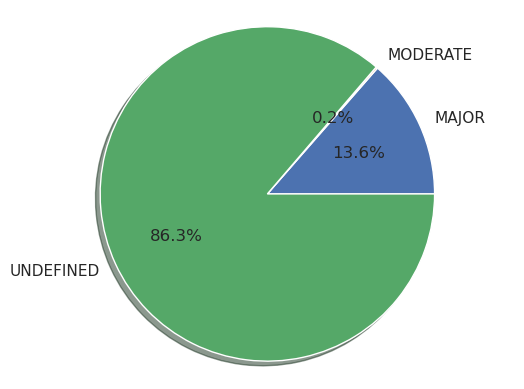

In [304]:
labels = data['magnitude_of_delay'].astype('category').cat.categories.tolist()
counts = data['magnitude_of_delay'].value_counts()

sizes = [counts[var_cat] for var_cat in labels]

fig, axl = plt.subplots()

axl.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the ¥ on plot
axl. axis('equal')

plt.show()

In [305]:
data.loc[data['magnitude_of_delay'] == 'MAJOR']['incidents'].value_counts()

4    366
3    162
2     65
1     62
0     23
Name: incidents, dtype: int64

In [306]:
data.drop(['magnitude_of_delay'], axis = 1, inplace = True)
test.drop(['magnitude_of_delay'], axis = 1, inplace = True)

In [307]:
data.head()

delay_in_seconds       record_date  luminosity  avg_temperature  \
0                 0  2021-03-15 23:00           2             12.0   
1               385  2021-12-25 18:00           2             12.0   
2                69  2021-03-12 15:00           1             14.0   
3              2297  2021-09-29 09:00           1             15.0   
4                 0  2021-06-13 11:00           1             27.0   

   avg_atm_pressure  avg_humidity  avg_wind_speed  avg_rain  incidents  
0            1013.0          70.0             1.0         0          0  
1            1007.0          91.0             1.0         0          0  
2            1025.0          64.0             0.0         0          1  
3            1028.0          75.0             1.0         0          4  
4            1020.0          52.0             1.0         0          3

In [308]:
data_dt = data.copy()

In [309]:
data_dt['record_date'] = pd.to_datetime(data_dt['record_date'], format='%Y-%m-%d %H:%M', errors='coerce')

In [310]:
data_dt['record_date'].head()

0   2021-03-15 23:00:00
1   2021-12-25 18:00:00
2   2021-03-12 15:00:00
3   2021-09-29 09:00:00
4   2021-06-13 11:00:00
Name: record_date, dtype: datetime64[ns]

In [311]:
data['date_year'] = data_dt['record_date'].dt.year
data['date_month'] = data_dt['record_date'].dt.month
data['date_day'] = data_dt['record_date'].dt.day
data['date_hour'] = data_dt['record_date'].dt.hour
data.drop(['record_date'], axis=1, inplace = True)
test['date_year'] = data_dt['record_date'].dt.year
test['date_month'] = data_dt['record_date'].dt.month
test['date_day'] = data_dt['record_date'].dt.day
test['date_hour'] = data_dt['record_date'].dt.hour
test.drop(['record_date'], axis=1, inplace = True)
data.head()

delay_in_seconds  luminosity  avg_temperature  avg_atm_pressure  \
0                 0           2             12.0            1013.0   
1               385           2             12.0            1007.0   
2                69           1             14.0            1025.0   
3              2297           1             15.0            1028.0   
4                 0           1             27.0            1020.0   

   avg_humidity  avg_wind_speed  avg_rain  incidents  date_year  date_month  \
0          70.0             1.0         0          0       2021           3   
1          91.0             1.0         0          0       2021          12   
2          64.0             0.0         0          1       2021           3   
3          75.0             1.0         0          4       2021           9   
4          52.0             1.0         0          3       2021           6   

   date_day  date_hour  
0        15         23  
1        25         18  
2        12         15  
3        29          9  
4        13         11

In [312]:
data['date_year'].unique()

array([2021])

In [313]:
data.drop(['date_year'], axis=1, inplace = True)
test.drop(['date_year'], axis=1, inplace = True)

In [314]:
data.head()

delay_in_seconds  luminosity  avg_temperature  avg_atm_pressure  \
0                 0           2             12.0            1013.0   
1               385           2             12.0            1007.0   
2                69           1             14.0            1025.0   
3              2297           1             15.0            1028.0   
4                 0           1             27.0            1020.0   

   avg_humidity  avg_wind_speed  avg_rain  incidents  date_month  date_day  \
0          70.0             1.0         0          0           3        15   
1          91.0             1.0         0          0          12        25   
2          64.0             0.0         0          1           3        12   
3          75.0             1.0         0          4           9        29   
4          52.0             1.0         0          3           6        13   

   date_hour  
0         23  
1         18  
2         15  
3          9  
4         11

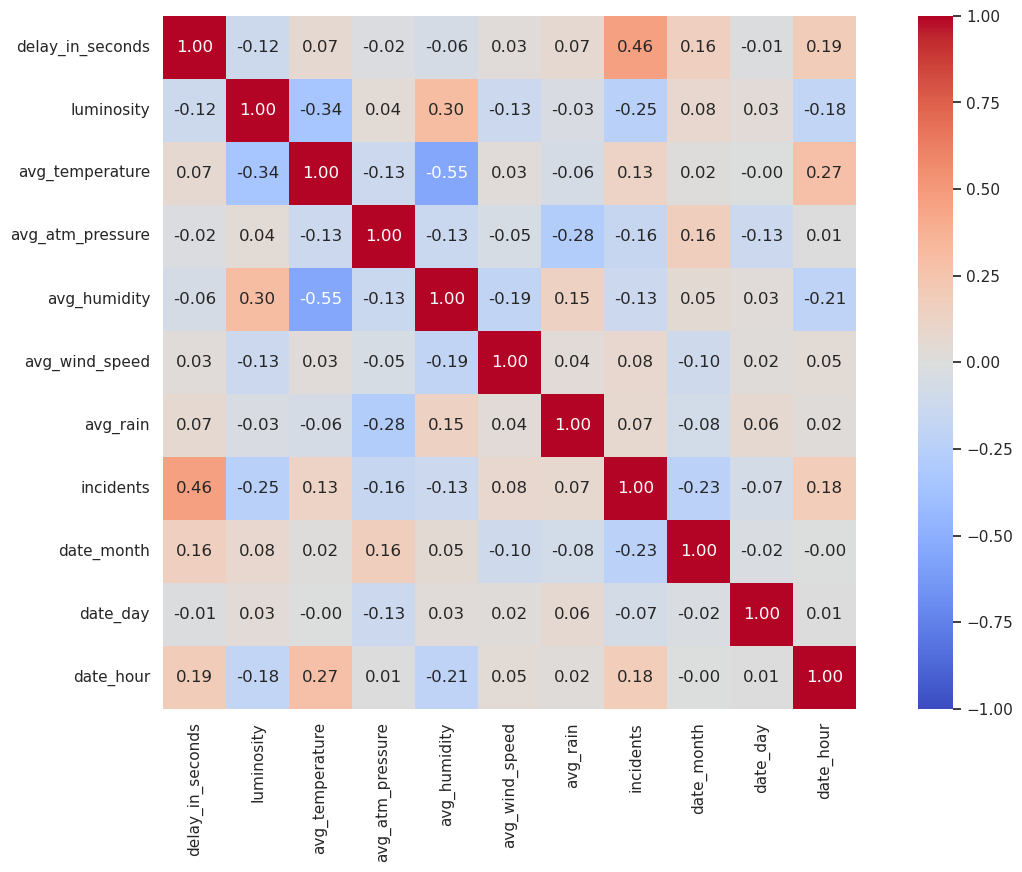

In [425]:
#Correlation
corr_matrix = data.corr()
f, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True, fmt='.2f', cmap='coolwarm');

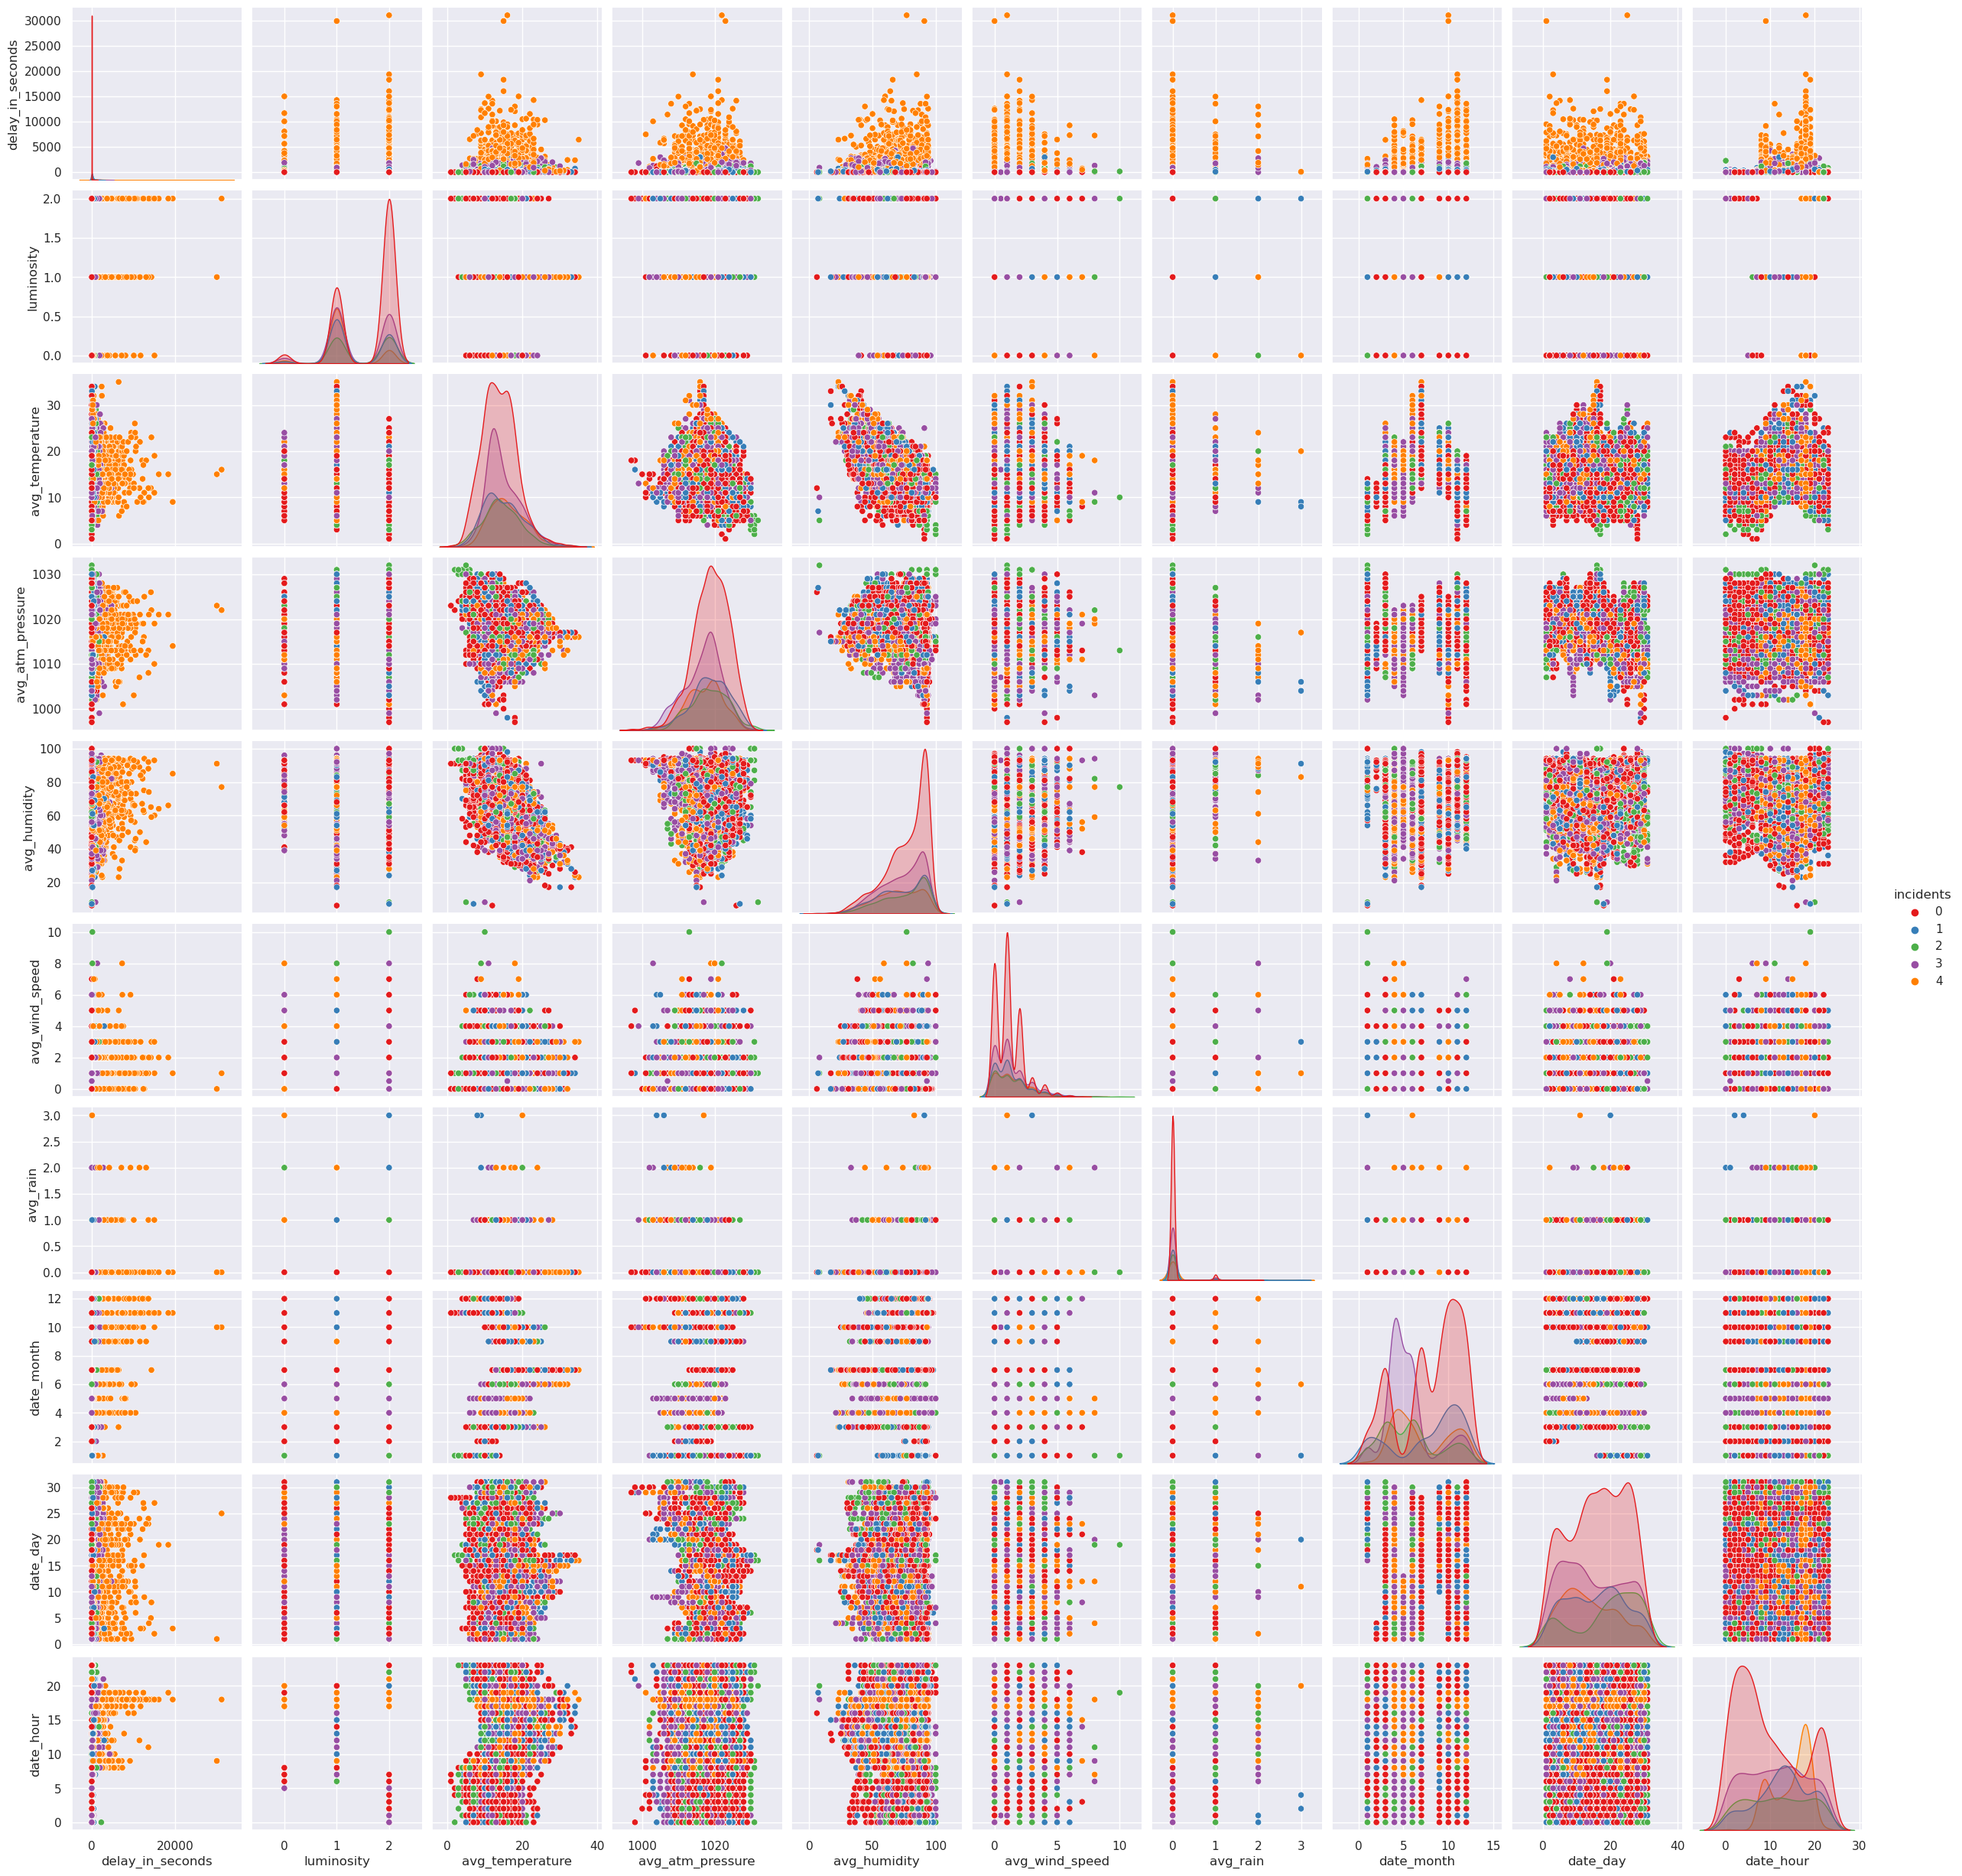

In [316]:
sns.pairplot(data, hue='incidents', palette='Set1')

# Exploratory Data Analysis

Time to put your data viz skills to the test! Try to recreate the following plots, make sure to import the libraries you'll need!

In [317]:
...

Ellipsis

# Train Test Split

** Split your data into a training set and a testing set.**

In [318]:
data.head()

delay_in_seconds  luminosity  avg_temperature  avg_atm_pressure  \
0                 0           2             12.0            1013.0   
1               385           2             12.0            1007.0   
2                69           1             14.0            1025.0   
3              2297           1             15.0            1028.0   
4                 0           1             27.0            1020.0   

   avg_humidity  avg_wind_speed  avg_rain  incidents  date_month  date_day  \
0          70.0             1.0         0          0           3        15   
1          91.0             1.0         0          0          12        25   
2          64.0             0.0         0          1           3        12   
3          75.0             1.0         0          4           9        29   
4          52.0             1.0         0          3           6        13   

   date_hour  
0         23  
1         18  
2         15  
3          9  
4         11

In [319]:
test.head()

delay_in_seconds  luminosity  avg_temperature  avg_atm_pressure  \
0              1211           1             15.0            1018.0   
1                 0           2             16.0            1018.0   
2                 0           1             22.0            1017.0   
3               140           1             18.0            1008.0   
4                 0           1             20.0            1022.0   

   avg_humidity  avg_wind_speed  avg_rain  date_month  date_day  date_hour  
0          80.0             0.0         0           3        15         23  
1          41.0             2.0         0          12        25         18  
2          71.0             0.0         0           3        12         15  
3          81.0             3.0         0           9        29          9  
4          86.0             0.0         0           6        13         11

In [365]:
X = data.drop('incidents', axis=1)
Y = data[['incidents']]
#X_train = data.drop(['incidents'], axis=1)
#y_train = data['incidents']
#X_test = test

In [321]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=2022)

## Decison Tree

In [322]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [323]:
#Create an instance of a Decision Tree classifier
#Again, defining the random_state for reproducibility
clf = DecisionTreeClassifier(random_state=2022)

In [324]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2022)

In [325]:
predictions = clf.predict(X_test)
predictions

array([1, 4, 0, ..., 3, 1, 3])

In [326]:
#predictions = pd.DataFrame(predictions)
#predictions.columns = ['Incidents']
#predictions.index += 1
#replace_map = {0 : {0 : 'None', 1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very_High'}}
#predictions.replace(replace_map, inplace = True)
#predictions.to_csv('predictions.csv', index = True, index_label = 'RowId')

In [327]:
confusion_matrix(y_test, predictions)

array([[613,  13,   5,   1,   0],
       [ 17, 167,  10,   7,   0],
       [  3,  15, 134,  22,   1],
       [  0,   6,  11, 271,  25],
       [  0,   2,   0,  23, 154]])

In [328]:
accuracy_score(y_test, predictions)

0.8926666666666667

In [329]:
precision_score(y_test, predictions, average='macro')

0.8641079661089739

In [330]:
recall_score(y_test, predictions, average='macro')

0.8585293315471345

In [331]:
f1_score(y_test, predictions, average='macro')

0.8609409549393163

In [332]:
fbeta_score(y_test, predictions, beta=0.5, average='macro')

0.8627451781634765

## SVM

In [333]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [334]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 43 to 4989
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   delay_in_seconds  3500 non-null   int64  
 1   luminosity        3500 non-null   int64  
 2   avg_temperature   3500 non-null   float64
 3   avg_atm_pressure  3500 non-null   float64
 4   avg_humidity      3500 non-null   float64
 5   avg_wind_speed    3500 non-null   float64
 6   avg_rain          3500 non-null   int64  
 7   date_month        3500 non-null   int64  
 8   date_day          3500 non-null   int64  
 9   date_hour         3500 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 300.8 KB


In [335]:
cross_valid_model = SVC(random_state=2021)
scores = cross_val_score(cross_valid_model, X_train, y_train, cv=10)
scores

array([0.5       , 0.54571429, 0.51142857, 0.54571429, 0.51714286,
       0.54285714, 0.53142857, 0.55714286, 0.53714286, 0.52571429])

In [336]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.53 accuracy with a standard deviation of 0.02


In [337]:
model = SVC(random_state=2021)
model.fit(X_train, y_train)

SVC(random_state=2021)

In [338]:
predictions = model.predict(X_test)
#predictions = pd.DataFrame(predictions)
#predictions.columns = ['Incidents']
#predictions.index += 1
#replace_map = {'Incidents' : {0 : 'None', 1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very_High'}}
#predictions.replace(replace_map, inplace = True)
#predictions.to_csv('predictions.csv', index = True, index_label = 'RowId')

In [339]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [340]:
print("%0.2f accuracy" % accuracy_score(y_test, predictions))

0.57 accuracy


/home/miguel/miniconda3/envs/daa/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


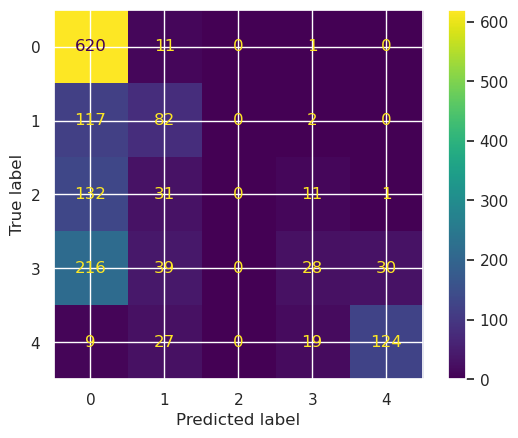

In [341]:
plot_confusion_matrix(model, X_test, y_test)

In [342]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.57      0.98      0.72       632
           1       0.43      0.41      0.42       201
           2       0.00      0.00      0.00       175
           3       0.46      0.09      0.15       313
           4       0.80      0.69      0.74       179

    accuracy                           0.57      1500
   macro avg       0.45      0.43      0.41      1500
weighted avg       0.49      0.57      0.48      1500



/home/miguel/miniconda3/envs/daa/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/miguel/miniconda3/envs/daa/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/miguel/miniconda3/envs/daa/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [343]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}

In [344]:
from sklearn.model_selection import GridSearchCV

In [345]:
grid = GridSearchCV(SVC(random_state=2021), param_grid, refit=True, verbose=3)

In [346]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.399 total time=   0.9s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.399 total time=   0.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.399 total time=   0.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.399 total time=   0.8s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.400 total time=   0.9s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.399 total time=   0.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.399 total time=   0.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.399 total time=   0.7s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.399 total time=   0.7s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.400 total time=   0.8s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.413 total time=   0.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(random_state=2021),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [347]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [348]:
grid.best_estimator_

SVC(C=1000, gamma=0.001, random_state=2021)

/home/miguel/miniconda3/envs/daa/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


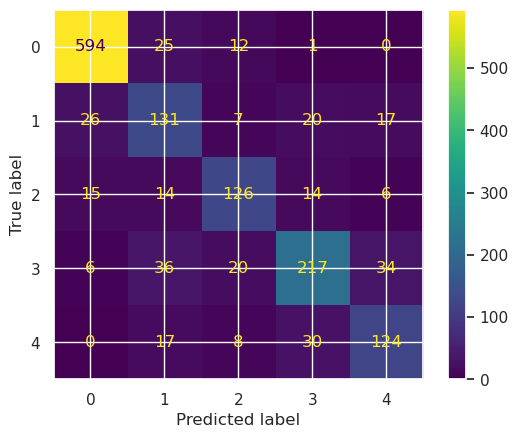

In [349]:
plot_confusion_matrix(grid, X_test, y_test)

In [350]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       632
           1       0.59      0.65      0.62       201
           2       0.73      0.72      0.72       175
           3       0.77      0.69      0.73       313
           4       0.69      0.69      0.69       179

    accuracy                           0.79      1500
   macro avg       0.74      0.74      0.74      1500
weighted avg       0.80      0.79      0.79      1500



## Neural

Build our neural network 

In [351]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
#from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler


In [89]:
#one-hot encoding
#from sklearn.preprocessing import LabelBinarizer
#
#lb = LabelBinarizer()
#lb_results = lb.fit_transform(Y)
#Y_one_hot = pd.DataFrame(lb_results, columns=lb.classes_)

In [367]:
#Scale the data
scaler_X = MinMaxScaler(feature_range=(0, 1)).fit(X)
#scaler_y = MinMaxScaler(feature_range=(0, 1)).fit(Y)
X_scaled = pd.DataFrame(scaler_X.transform(X[X.columns]), columns=X.columns)
#Y_scaled = pd.DataFrame(scaler_y.transform(Y[Y.columns]), columns=Y.columns)

In [418]:
## to generate the csv
#X = data.drop('incidents', axis=1)
#Y = test
#
#scaler_X = MinMaxScaler(feature_range=(0, 1)).fit(X)
#X_scaled = pd.DataFrame(scaler_X.transform(X[X.columns]), columns=X.columns)
#
#scaler_Y = MinMaxScaler(feature_range=(0, 1)).fit(Y)
#Y_scaled = pd.DataFrame(scaler_Y.transform(Y[Y.columns]), columns=Y.columns)
#
#X_train = X_scaled
#y_train = data[['incidents']]
#
#X_test = Y_scaled
#

In [368]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=2022)

In [419]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5000, 10) (5000, 1) (1206, 10) (1206, 10)


In [376]:
def build_model(activation='relu', learning_rate=0.01):
    model = Sequential()
    #model.add(Dense(20, input_dim=10, activation=activation))
    model.add(Dense(20, input_dim=10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        metrics=['accuracy']
    )
    return model

In [377]:
model = build_model()
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 20)                220       
                                                                 
 dense_76 (Dense)            (None, 10)                210       
                                                                 
 dense_77 (Dense)            (None, 5)                 55        
                                                                 
Total params: 485
Trainable params: 485
Non-trainable params: 0
_________________________________________________________________


In [410]:
TUNING_DICT = {
    #'activation': ['relu', 'tanh'],
    'learning_rate' : [0.01,0.001],
    'batch_size' : [32],
    'epochs' : [40]
}

In [411]:
kf = KFold(n_splits=10, shuffle=True, random_state=2022)

model = KerasClassifier(build_model, activation='relu', learning_rate=0.01)
grid_search = GridSearchCV(estimator = model,
                           param_grid = TUNING_DICT,
                           cv = kf,
                           scoring = 'accuracy',
                           verbose = 3,
                           n_jobs = -1)

grid_search.fit(X_train, y_train, validation_split=0.3)

/tmp/ipykernel_25281/1374826196.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_model, activation='relu', learning_rate=0.01)


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Epoch 1/40
Epoch 1/40
Epoch 1/40
Epoch 1/40
Epoch 1/40
Epoch 1/40
Epoch 1/40
Epoch 1/40
Epoch 1/40
Epoch 1/40
Epoch 1/40
Epoch 1/40
99/99 [==============================] - 3s 14ms/step - loss: 1.4215 - accuracy: 0.4079 - val_loss: 1.4156 - val_accuracy: 0.4074
Epoch 2/40
99/99 [==============================] - 3s 15ms/step - loss: 1.4428 - accuracy: 0.3997 - val_loss: 1.3760 - val_accuracy: 0.4444
Epoch 2/40
99/99 [==============================] - 3s 13ms/step - loss: 1.5332 - accuracy: 0.3517 - val_loss: 1.4686 - val_accuracy: 0.3956
Epoch 2/40
 1/99 [..............................] - ETA: 0s - loss: 1.0683 - accuracy: 0.6250Epoch 2/40
Epoch 2/40
99/99 [==============================] - 3s 16ms/step - loss: 1.4515 - accuracy: 0.3886 - val_loss: 1.3925 - val_accuracy: 0.4141
Epoch 2/40
99/99 [==============================] - 3s 17ms/step - loss: 1.4187 - accuracy: 0.3990 - val_loss: 1.3868 - val_accuracy: 0.4274
Epoch 2/4

GridSearchCV(cv=KFold(n_splits=10, random_state=2022, shuffle=True),
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f87314d61c0>,
             n_jobs=-1,
             param_grid={'batch_size': [32], 'epochs': [40],
                         'learning_rate': [0.01, 0.001]},
             scoring='accuracy', verbose=3)

In [413]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
accuracy = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']
for accuracy, param in zip(accuracy, params):
    print("%f with: %r" % (accuracy, param))


Best: 0.760200 using {'batch_size': 32, 'epochs': 40, 'learning_rate': 0.01}
0.760200 with: {'batch_size': 32, 'epochs': 40, 'learning_rate': 0.01}
0.656400 with: {'batch_size': 32, 'epochs': 40, 'learning_rate': 0.001}


In [420]:
best_mlp_model = grid_search.best_estimator_

In [421]:
#predictions = best_mlp_model.predict(X_test)
#predictions = pd.DataFrame(predictions)
#predictions.columns = ['Incidents']
#predictions.index += 1
#replace_map = {'Incidents' : {0 : 'None', 1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very_High'}}
#predictions.replace(replace_map, inplace = True)
#predictions.to_csv('predictions.csv', index = True, index_label = 'RowId')

38/38 [==============================] - 0s 7ms/step


In [398]:
from livelossplot import PlotLossesKerasTF

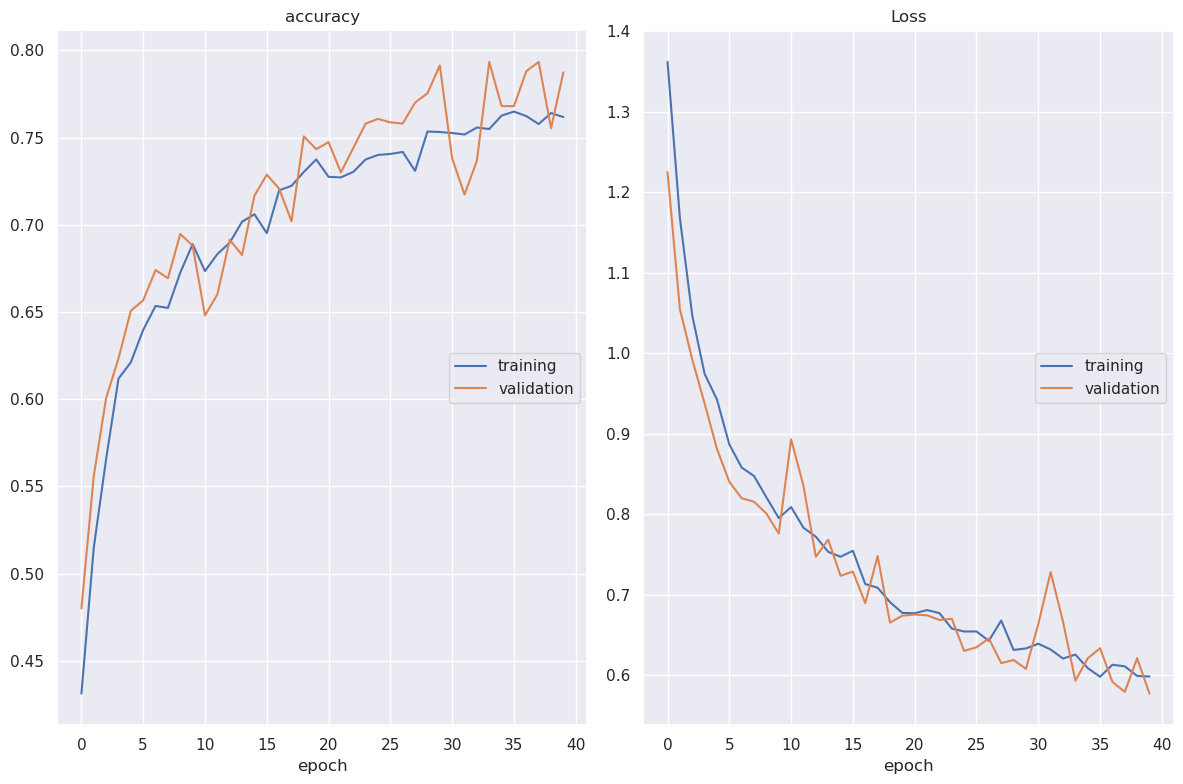

accuracy
	training         	 (min:    0.431, max:    0.765, cur:    0.762)
	validation       	 (min:    0.480, max:    0.793, cur:    0.787)
Loss
	training         	 (min:    0.598, max:    1.362, cur:    0.599)
	validation       	 (min:    0.577, max:    1.225, cur:    0.577)
110/110 [==============================] - 2s 19ms/step - loss: 0.5987 - accuracy: 0.7617 - val_loss: 0.5774 - val_accuracy: 0.7873


In [404]:
#print the validation accuracy and loss after each epoch
plot_losses = PlotLossesKerasTF()

best_mlp_model.fit(X_train, y_train, 
                   validation_data=(X_test, y_test),
                   callbacks=[PlotLossesKerasTF()], verbose=1)

In [405]:
predictions = best_mlp_model.predict(X_test)

47/47 [==============================] - 1s 11ms/step
